In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

#Ipython Libraries
# Remember to remove when you pass to Spyder.
from IPython.display import Image


The picture shows where we took measures.

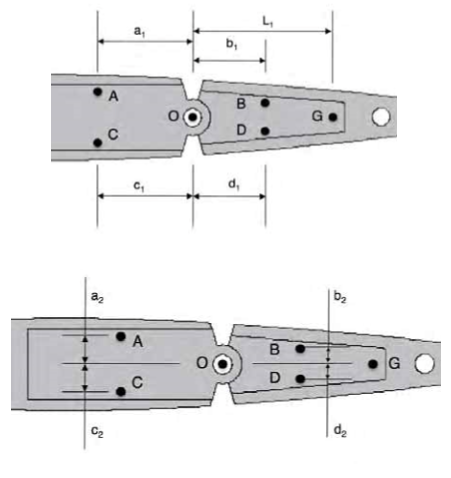

In [6]:
Image(filename='axis.png')

In [11]:
#chord_length =  #refers to the imaginary straight line joining the leading and trailing edges of an aerofoil.
#thikness =  #The wing thickness is the distance between the upper and lower surface of the wing (or airfoil)
a1 = 1
a2 = 1
b1 = 1
b2 = 1
c1 = 2
c2 = 2
d1 = 2
d2 = 2
theta_zero = 0.0
eta = 1.5 # this eta means we have x percent of displacement
spring_lenght = 0.1
interations = 21

Calculate the absolute value of the angle deslocation.

In [12]:
def Angle_Deslocation(eta,x1,y1,x2,y2,theta_zero):
    def Distance_AB (x1,y1,x2,y2,theta_zero):
        rx = x2*math.cos(theta_zero) - y2*math.sin(theta_zero) + x1
        ry = x2*math.sin(theta_zero) + y2*math.cos(theta_zero) - y1
        return rx,ry
    
    def Angle(eta,x1,y1,x2,y2,rx,ry):
        A1 = eta*rx + x1
        A2 = eta*ry - y1
        cos = (A2 + A1*(x2/y2))/(y2 +(x2/y2)*x2)
        sin = (x2*cos - A1) / y2
        theta = math.atan2(sin,cos)
        return theta
    
    rx,ry = Distance_AB(x1,y1,x2,y2,theta_zero)
    alpha = Angle(eta,x1,y1,x2,y2,rx,ry)
    theta =  abs (1.1071487177937063 - abs(alpha)) # returns the deslocation in the direction +x to +y in radians
    # The number (1.1071487177937063) is just a correction factor to receive only the deslocation.
    theta_degrees = math.degrees(theta) # The number (1.1071487177937063) is just a correction factor
    return theta_degrees

Uses a range to show a graphic of the absolutes values of the angle deslocation of AB.

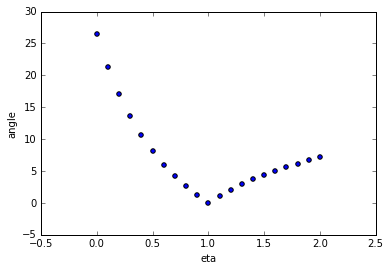

In [13]:
stretching_linear = []
angle_linear = []

for i in range (interations):
    stretching_value = i*0.1
    stretching_linear.append(stretching_value)
    angle_value = Angle_Deslocation(stretching_value,a1,a2,b1,b2,theta_zero)
    angle_linear.append(angle_value)
    
fig = plt.figure()

fig.add_subplot(111)
plt.scatter(stretching_linear,angle_linear)
plt.xlabel('eta')
plt.ylabel('angle')
    
    
plt.show()
    

    

Above you have the first. Eta X Angle

In [ ]:
1.0   -   63.4349488229     -   -2.20094383957e-11
1.1   -   62.3540246363     -   1.08092418664
1.2   -   61.389540334      -   2.04540848887
1.3   -   60.5241109968     -   2.91083782615
1.4   -   59.7435628365     -   3.69138598643
1.5   -   59.0362434679     -   4.39870535497
1.6   -   58.3924977538     -   5.04245106915
1.7   -   57.8042660653     -   5.63068275761
1.8   -   57.2647737279     -   6.17017509501
1.9   -   56.768288932      -   6.66665989088
2.0   -   56.309932474      -   7.12501634888

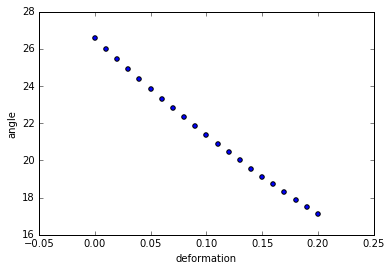

In [14]:
deformation_linear = []
angle_linear = []

for i in range (interations):
    deformation_value = (i*0.1)*spring_lenght
    deformation_linear.append(deformation_value)
    angle_value = Angle_Deslocation(deformation_value,a1,a2,b1,b2,theta_zero)
    angle_linear.append(angle_value)
    
fig = plt.figure()

fig.add_subplot(111)
plt.scatter(deformation_linear,angle_linear)
plt.xlabel('deformation')
plt.ylabel('angle')
       
plt.show()

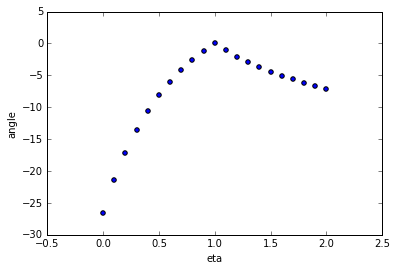

In [15]:
stretching = []
angle = []

for i in range (interations):
    stretching_value = i*0.1
    stretching.append(stretching_value)
    angle_value = (Angle_Deslocation(stretching_value,c1,-c2,d1,-d2,theta_zero)*-1) # The(-1) is because we are using the abslute
    angle.append(angle_value)                                                       # value in the Angle_Deslocation function.
    
fig = plt.figure()


fig.add_subplot(111)
plt.scatter(stretching,angle)
plt.xlabel('eta')
plt.ylabel('angle')
    
    
plt.show()
    

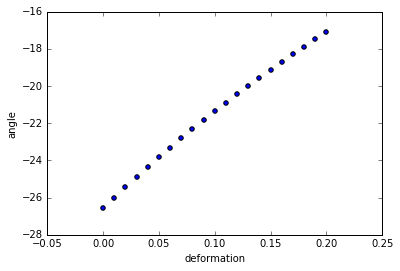

In [16]:
deformation = []
angle = []


for i in range (interations):
    deformation_value = (i*0.1)*spring_lenght
    deformation.append(deformation_value)
    angle_value = (Angle_Deslocation(deformation_value,c1,-c2,d1,-d2,theta_zero)*-1)#The(-1) is because we are using the absolute
    angle.append(angle_value)                                                       # value in the Angle_Deslocation function.
    
fig = plt.figure()

fig.add_subplot(111)
plt.scatter(deformation,angle)
plt.xlabel('deformation')
plt.ylabel('angle')
   
plt.show()

The comparison between the two springs.

21 21


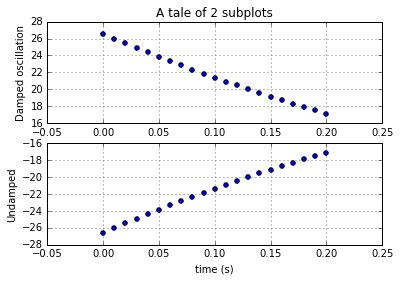

In [35]:
print len(deformation_linear),len(angle_linear)
fig = plt.figure()

fig.add_subplot(211)
plt.scatter(deformation_linear,angle_linear)
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
plt.grid()

fig.add_subplot(212)
plt.scatter(deformation,angle)
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.grid()


plt.show()

21 21


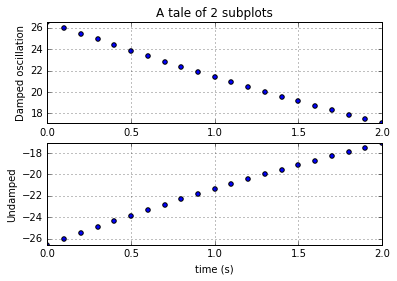

In [33]:
print len(stretching_linear),len(angle_linear)
fig = plt.figure()

fig.add_subplot(211)
plt.scatter(stretching_linear,angle_linear)
plt.axis([min(stretching_linear + stretching),max(stretching_linear + stretching), min(angle_linear), max(angle_linear)])
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
plt.grid()

fig.add_subplot(212)
plt.scatter(stretching,angle)
plt.axis([min(stretching_linear + stretching),max(stretching_linear + stretching), min(angle), max(angle)])
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.grid()
plt.show()